# Premier League 2018/2019
As a huge fan of Arsenal F.C. fan I played the role of Data Analysis in London Colney (Arsenal Traning Ground)

Imagine that Mikel Arteta coach of Arsenal asked you to do a little analysis:

- You need to do linear relationship between taken shots and goals for each game in 2018-2019 season 📊
- How many times did Arsenal win the first half and lose a full game? 🗺️
- How many yellow and red cards did the referees give to the players throughout the season 🔎
- Which team scored the most goals in the 2018/2019 against Arsenal? ⚽


Let's figure out what this csv_file contains, then check the tasks.

Below each task there is my conclusion :). Have fun!

In [326]:
import pandas as pd

file = pd.read_csv("soccer18-19.csv")
print(file.head())

  Div     Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  10/8/18    Man United       Leicester     2     1   H     1     0   H   
1  E0  11/8/18   Bournemouth         Cardiff     2     0   H     1     0   H   
2  E0  11/8/18        Fulham  Crystal Palace     0     2   A     0     1   A   
3  E0  11/8/18  Huddersfield         Chelsea     0     3   A     0     2   A   
4  E0  11/8/18     Newcastle       Tottenham     1     2   A     1     2   A   

   ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  ...   6    4  11   8   2   5   2   1   0   0  
1  ...   4    1  11   9   7   4   1   1   0   0  
2  ...   6    9   9  11   5   5   1   2   0   0  
3  ...   1    4   9   8   2   5   2   1   0   0  
4  ...   2    5  11  12   3   5   2   2   0   0  

[5 rows x 23 columns]


There is an explanation for each row below.

## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

Before everything we can look in shape of this table, check types of data etc.

In [327]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## 1. Imagine that Mikel Arteta coach of Arsenal asked you to do a little analysis after the 2018-2019 season about linear relationship between taken shots and goals for each game 📊
1.1. Analyse for Home matches

1.2. Analyse for Away matches

In [328]:
#we need to import rest of packages
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1.1. Home matches

Correlation of Shots at Home and Goals at Home is: 0.46132327302810966
                            OLS Regression Results                            
Dep. Variable:                   FTHG   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     4.596
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0468
Time:                        15:18:48   Log-Likelihood:                -28.080
No. Observations:                  19   AIC:                             60.16
Df Residuals:                      17   BIC:                             62.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

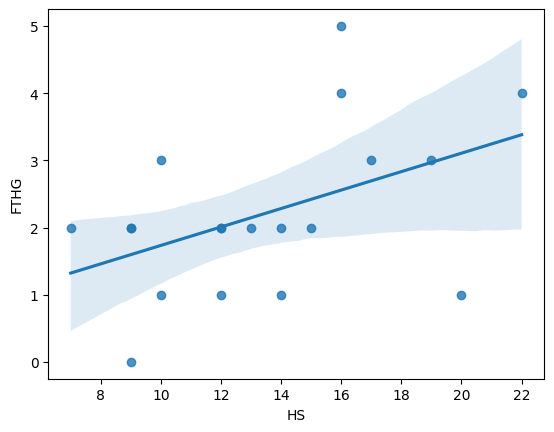

In [329]:
##Analyse for Home matches
a = {'Arsenal'}
homematches = file[file["HomeTeam"].isin(a)]
#print(homematches)

homeshots = homematches["HS"]
homegoals = homematches["FTHG"]

sns.regplot(x = "HS", y= "FTHG", data = homematches)


correlation = homematches["HS"].corr(homematches["FTHG"])
print("Correlation of Shots at Home and Goals at Home is: " + str(correlation))
dfx1 = sm.add_constant(homeshots)
result = sm.OLS(homegoals,dfx1).fit()
print(result.summary())


Conclusion:
- R-squared is 0.213. It means that “statistically” there’s no connection between shots and goals. Moreover, the regression of the model explains only 20% data. In other words, shots explain only about 20% of goals. Pretty weak connection! I guess it's because we had only a few home matches (19)

## 1.2. Away matches

Correlation of Shots at Away and Goals at Away is: 0.3209562071785704
                            OLS Regression Results                            
Dep. Variable:                   FTAG   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.952
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.180
Time:                        15:18:49   Log-Likelihood:                -29.059
No. Observations:                  19   AIC:                             62.12
Df Residuals:                      17   BIC:                             64.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

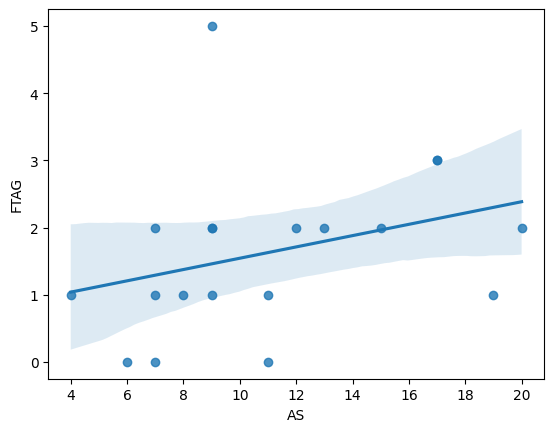

In [330]:
##Analyse for away matches
a = {'Arsenal'}
awaymatches = file[file["AwayTeam"].isin(a)]
#print(homematches)

awayshots = awaymatches["AS"]
awaygoals = awaymatches["FTAG"]

sns.regplot(x = "AS", y= "FTAG", data = awaymatches)

correlation1 = awaymatches["AS"].corr(awaymatches["FTAG"])
print("Correlation of Shots at Away and Goals at Away is: " + str(correlation1))
dfx2 = sm.add_constant(awayshots)
result = sm.OLS(awaygoals,dfx2).fit()
print(result.summary())

Conclusion:
- R-squared is 0.103. It means that “statistically there’s no connection between shots and goals. Moreover, the regression of the model explains only 10% data. In other words, shots explain only about 10% of goals. Pretty weak connection! I guess it's because we had only a few away matches (19)

## 2. How many times did Arsenal win first half and win either full game? 🗺️

In [331]:
##Step 1
Arsenalhomegames = file["HomeTeam"] == 'Arsenal'
Arsenalawaygames = file["AwayTeam"] == 'Arsenal'


summary = file[Arsenalhomegames | Arsenalawaygames] ## "|" to add those two statements

##Step 2
## if Arsenal was at home, won first half, won full game

df = summary[(summary['HomeTeam'] == 'Arsenal') & (summary['HTR'] == 'H') & (summary['FTR'] == 'H')]
count_row = df.shape[0]

## if Arsenal was at away, won first half, won full game

df1 = summary[(summary['AwayTeam'] == 'Arsenal') & (summary['HTR'] == 'A') & (summary['FTR'] == 'A')]
count_row1 = df1.shape[0]

print("Number of home games, won in half and full game: " + str(count_row))
print("Number of away games, won in half and full game: " + str(count_row1))

Number of home games, won in half and full game: 7
Number of away games, won in half and full game: 2
Arsenal in 2018/2019 season has: 1 comeback


Additionally, we can count number of "Comebacks" (Winning game after losing in half time)


In [332]:
df3 = summary[(summary['AwayTeam'] == 'Arsenal') & (summary['HTR'] == 'H') & (summary['FTR'] == 'A')]
df4 = summary[(summary['HomeTeam'] == 'Arsenal') & (summary['HTR'] == 'A') & (summary['FTR'] == 'H')]

count_row3 = df3.shape[0]
count_row4 = df4.shape[0]

print("Arsenal in 2018/2019 season has: " + str(count_row3 + count_row4) + " comeback")

Arsenal in 2018/2019 season has: 1 comeback


## 3. How many yellow and red cards did referees show per game? 🔎

<AxesSubplot:xlabel='Referee'>

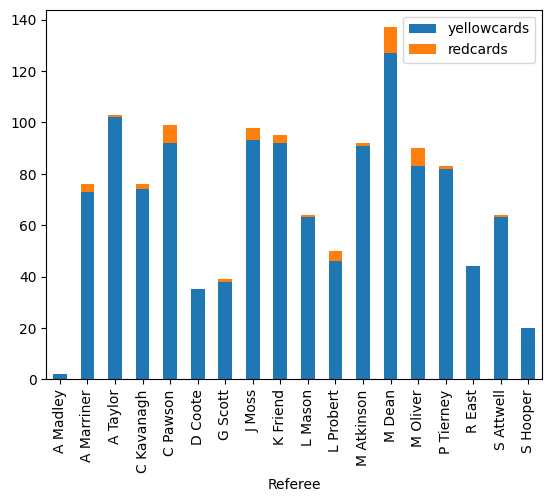

In [333]:
##In this case we will analyse every team, not only Arsenal.
## We need to sum yellow and red cards and group by referees
## step 1
## Adding new two columns to our file
file["yellowcards"] = file['HY'] + file['AY']
file["redcards"] = file['HR'] + file['AR']

#print(file) ##You can check if it works properly
## step 2
## grouping by referees

referees = file.groupby("Referee")[["yellowcards", "redcards"]].sum()

## step 3
## We can use bar plot to visualization

referees.plot(kind = 'bar', stacked = True)

Conclusion:
- Mike Dean gave the most red and yellow cards.

## 4. Which team scored the most goals in season 2018/2019 against Arsenal?

Firstly, we can look at games only in Emirates Stadium (Arsenal Stadium)

<AxesSubplot:xlabel='AwayTeam'>

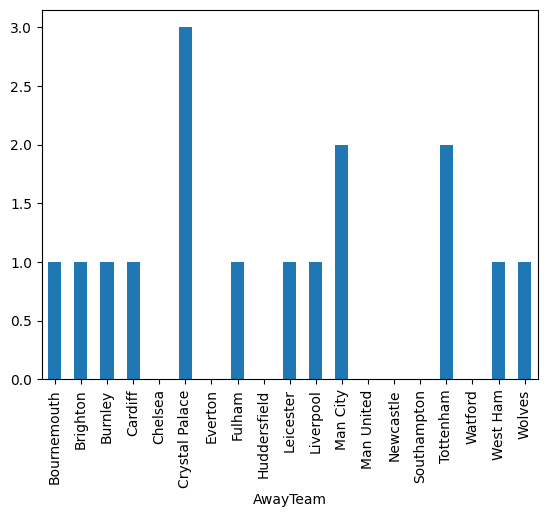

In [334]:
a = {'Arsenal'}
h = file[file["HomeTeam"].isin(a)]


h.groupby("AwayTeam")["FTAG"].sum().plot(kind = 'bar', label = 'Lost Goals at Emirates Stadium')

Conclusion:
- As we see Arsenal lost three goals against Crystal Palace! That was really poor performance by Arsenal, so they lost this match 2-3.

Now let's look at away matches

<AxesSubplot:xlabel='HomeTeam'>

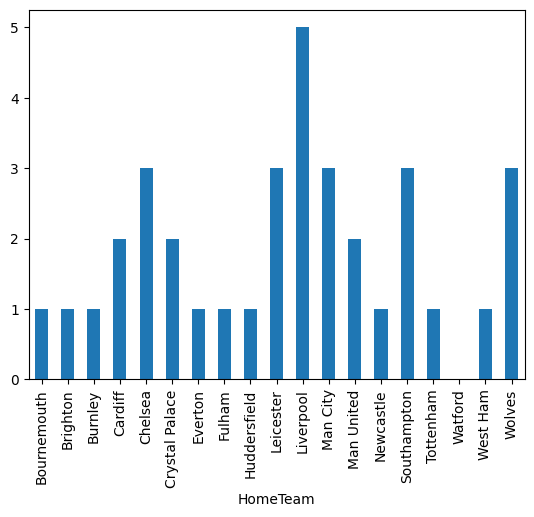

In [335]:
aw = file[file["AwayTeam"].isin(a)]

aw.groupby("HomeTeam")["FTHG"].sum().plot(kind = 'bar', label = 'Lost Goals at enemy Stadium')

Conclusion:
- Arsenal had a problem with away matches, they lost more goals
- The worst performance was against Liverpool!

# Thanks for reading my analyse of Arsenal 2018/2019 season.
If you have any question or idea how I could improve this analysis just let me know :)
